In [1]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from datetime import datetime
from bs4 import BeautifulSoup as bs
import pandas as pd
import time

In [2]:
# Chrome 옵션 설정
options = Options()
options.binary_location = "..\\chrome-win64\\chrome.exe" # chrome 경로 설정
options.add_argument("--no-sandbox") # sandbox 설정
options.add_argument("--disable-dev-shm-usage") # 공유메모리 설정
options.add_argument("--window-size=1920,1080") # 화면크기설정, 반응형 웹 대비
# options.add_argument("--disable-gpu") # GPU 비활성화

# ChromeDriver 설정
service = Service("..\\chromedriver.exe")
driver = webdriver.Chrome(service=service, options=options)
driver.get("https://www.opinet.co.kr/")
print(driver.title)

# 요소찾기
time.sleep(2)
hover_element = driver.find_element(By.CSS_SELECTOR, "#header > div > ul > li:nth-child(1) > a").click()
menu_option = driver.find_element(By.CSS_SELECTOR,"#header > div > ul > li:nth-child(1) > ul > li:nth-child(1) > a").click()

# 마우스 호버 액션
actions = ActionChains(driver)
actions.move_to_element(hover_element).perform()

# 약간의 시간을 기다린 후 클릭
time.sleep(1)
menu_option.click()
time.sleep(5)

싼 주유소 찾기 오피넷


AttributeError: move_to requires a WebElement

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import numpy as np
import folium

from hdfs import InsecureClient

Text(0.2, 0.4, '한글')

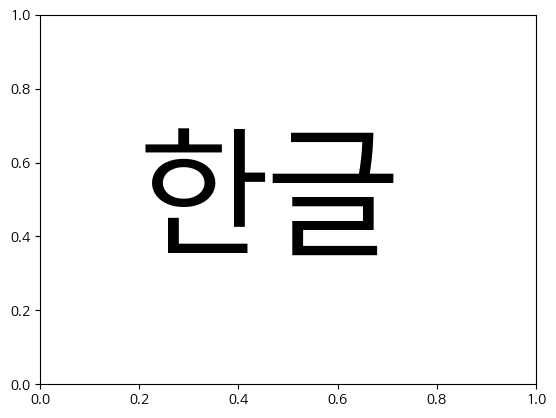

In [4]:
from matplotlib import rc
path = "C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [ ]:
hdfs = InsecureClient("http://namenode:9870", user="hadoop") 
path = '/user/hadoop/'
file = '부산 강서구.csv'
full_path = path + file
# with hdfs.read(full_path, encoding="UTF-8") as reader:
#     data = pd.read_csv(reader)
# data
with hdfs.read(full_path,encoding="UTF-8") as reader:
    data = pd.read_csv(reader)
data
# paths = [
#     "부산 강서구.csv", "부산 금정구.csv", "부산 기장군.csv", "부산 남구.csv",
#     "부산 동구.csv", "부산 동래구.csv", "부산 부산진구.csv", "부산 북구.csv",
#     "부산 사상구.csv", "부산 사하구.csv", "부산 서구.csv", "부산 수영구.csv",
#     "부산 연제구.csv", "부산 영도구.csv", "부산 중구.csv", "부산 해운대구.csv"
# ]
data.append()
data
# datas = []
# for path in paths:  # 리스트에서 각 파일의 경로를 하나씩 읽음
#     with hdfs.read(path, encoding="UTF-8") as reader:
#         datas.append(pd.read_csv(reader))
# datas

In [ ]:
hdfs = InsecureClient("http://namenode:9870", user="hadoop") 
path = '/user/hadoop/'
files = [
    "부산 강서구.csv", "부산 금정구.csv", "부산 남구.csv","부산 동구.csv", 
    "부산 동래구.csv", "부산 부산진구.csv", "부산 북구.csv","부산 사상구.csv", 
    "부산 사하구.csv", "부산 서구.csv", "부산 수영구.csv","부산 연제구.csv", 
    "부산 영도구.csv", "부산 중구.csv", "부산 해운대구.csv"]
full_path = path + file
# with hdfs.read(full_path, encoding="UTF-8") as reader:
#     data = pd.read_csv(reader)
data = []
with hdfs.read(full_path,encoding="UTF-8") as reader:
    data = pd.read_csv(reader)
data
# paths = [
#     "부산 강서구.csv", "부산 금정구.csv", "부산 기장군.csv", "부산 남구.csv",
#     "부산 동구.csv", "부산 동래구.csv", "부산 부산진구.csv", "부산 북구.csv",
#     "부산 사상구.csv", "부산 사하구.csv", "부산 서구.csv", "부산 수영구.csv",
#     "부산 연제구.csv", "부산 영도구.csv", "부산 중구.csv", "부산 해운대구.csv"
# ]
data.append()
data
# datas = []
# for path in paths:  # 리스트에서 각 파일의 경로를 하나씩 읽음
#     with hdfs.read(path, encoding="UTF-8") as reader:
#         datas.append(pd.read_csv(reader))
# datas

In [ ]:
from hdfs import InsecureClient
import pandas as pd

# HDFS 연결
hdfs = InsecureClient("http://namenode:9870", user="hadoop") 
base_path = '/user/hadoop/'

# 파일 경로 리스트
paths = [
    "부산 강서구.csv", "부산 금정구.csv", "부산 남구.csv","부산 동구.csv", 
    "부산 동래구.csv", "부산 부산진구.csv", "부산 북구.csv","부산 사상구.csv", 
    "부산 사하구.csv", "부산 서구.csv", "부산 수영구.csv","부산 연제구.csv", 
    "부산 영도구.csv", "부산 중구.csv", "부산 해운대구.csv"]

# 전체 데이터를 저장할 리스트
all_data = []

# 각 파일 반복하며 읽기
for file in paths:
    full_path = base_path + file
    with hdfs.read(full_path, encoding="UTF-8") as reader:
        df = pd.read_csv(reader)
        df['구'] = file.replace(".csv", "")  # '구' 컬럼 추가
        all_data.append(df)

# 통합 DataFrame 생성
combined_df = pd.concat(all_data, ignore_index=True)

# 확인
print(combined_df.head())